In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
data = sns.load_dataset("titanic")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
len(data)

891

In [10]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

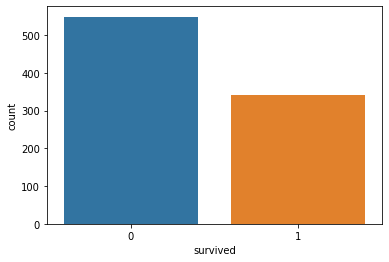

In [11]:
sns.countplot(x=data['survived'])
plt.show()

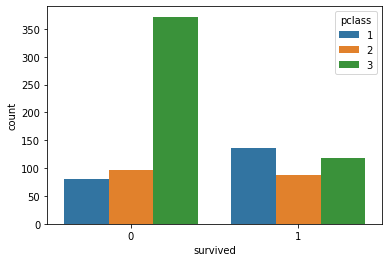

In [12]:
sns.countplot(x=data['survived'], hue=data['pclass'])
plt.show()

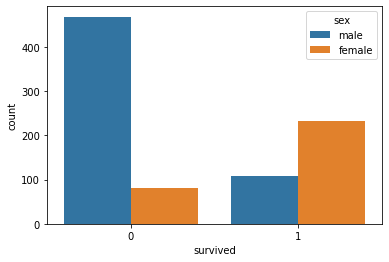

In [13]:
sns.countplot(x=data['survived'], hue=data['sex'])
plt.show()

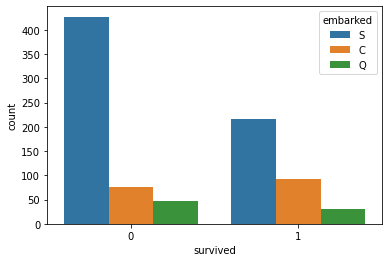

In [14]:
sns.countplot(x=data['survived'], hue=data['embarked'])
plt.show()

In [15]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [16]:
cols =['fare', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

In [17]:
data_new = data.drop(cols, axis=1)
data_new

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [18]:
data_new.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
dtype: int64

In [19]:
mean_age = data_new["age"].mean()
mean_age = np.round(mean_age, 2)
mean_age

29.7

In [20]:
data_new['age'] = data_new['age'].fillna(mean_age)

In [21]:
data_new.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    2
dtype: int64

In [22]:
data_new = data_new.dropna()

In [23]:
data_new.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data_new['sex'] = enc.fit_transform(data_new['sex'])

C:\Users\shara\AppData\Local\Temp/ipykernel_24672/67093066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['sex'] = enc.fit_transform(data_new['sex'])


In [25]:
data_new['embarked'] = enc.fit_transform(data_new['embarked'])

C:\Users\shara\AppData\Local\Temp/ipykernel_24672/992371747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['embarked'] = enc.fit_transform(data_new['embarked'])


In [26]:
x = np.array(data_new.iloc[:,1:])

In [27]:
y = np.array(data_new.iloc[:,0])

In [28]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8, random_state = 3)

In [29]:
pd.DataFrame(y).value_counts()

0    549
1    340
dtype: int64

In [30]:
pd.DataFrame(ytrain).value_counts()

0    439
1    272
dtype: int64

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, p=2)

In [32]:
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [33]:
ypred = model.predict(xtest)

In [35]:
ytest[1] == ypred[1]

True

In [36]:
count = 0
for i in range(len(ytest)):
  if ypred[i] == ytest[i]:
    count = count + 1
count

133

In [37]:
count/len(ytest)

0.7471910112359551

In [38]:
from sklearn.metrics import accuracy_score
a = accuracy_score(ytest,ypred)
a

0.7471910112359551

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[92, 18],
       [27, 41]], dtype=int64)

In [40]:
acc = (94+45)/(94+16+23+45)
acc

0.7808988764044944

In [41]:
import joblib 
joblib.dump(model, "titanic.pkl")

['titanic.pkl']

In [ ]:
mymodel = joblib.load("/content/titanic.pkl")

In [ ]:
mymodel.predict(xtest)

In [ ]:
mymodel.predict([[1,1,22,2,0,1]])

In [ ]:
d={}
for i in range(1,439):
  model = KNeighborsClassifier(n_neighbors=i, p=2)
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  count = 0
  for j in range(len(ytest)):
    if ypred[j] == ytest[j]:
      count = count + 1
  d[i] = count/len(ytest)
for i, j in d.items():
  if j == max(d.values()):
    print(i,j)